#**How can Electronic Arts (EA) increase their market share in the video game industry?**

> **Name/Student ID**

> Ishan Nagrani:  U30927090

> Mugdha Khairnar: U63165090

> Xin Hu: U87681875 

> Xinyi Li: U47450217

> Yiping Ren: U96787300



# 1. BUSINESS PROBLEM

## 1.1 Objective

*Business Intelligence*

Electronic Arts (EA) has been one of the top video game companies since 1982. Gaming industry has become competitive with an increase in new publishers and genres. Our challenge with this project is to analyze what genres EA can tap into to increase overall profitability in North America. We will use descriptive analytics to determine which genres EA should focus its time on, while also considering its competitors.


## 1.2 Data Source

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of [vgchartz.com](https://www.vgchartz.com)

Dataset link: https://www.kaggle.com/datasets/gregorut/videogamesales

## 1.3 Motivation/Introduction

The gaming industry is booming and has been ever since the release of the first console in 1972. Although there are a few different types of games, they all have a fanbase that keeps increasing over time. And while most people identify gaming unfairly with male teenagers and under 25s, it's not just for them: any age can be involved in playing video games as far as they enjoy it. There are many different types of games you can play - from sports simulations to casual puzzle games - as well as platforms such as mobile phones, tablets, and consoles. As of 2022, there are around 3.24 Billion gamers in the world - this shows just how big the industry is.

EA is one of the top video game publishers in the world. They have a lot of hits under their belt, but they don't always hit it out of the park with each release. In order to make money, they must release games that sell well, so each genre presents a different challenge when it comes to making them appealing and playable.

Our goal is to analyze data on the sales of video games, and make data-driven decisions to find out the genre that has the potential to increase EA's market share in the video game industry.

## 1.4 Executive Summary

We analysed the global sales data video games to determine which genre would help EA increase its market share. We focused on North America as it captured most of the market. To ensure that we had relevant numbers, we filtered out null values and duplicates and got the date range that displayed accurate data. Descriptive analytics helped us understand what genres of games EA had better success selling than its competitors and how they fared in each category. We found out that role-playing games are likely to see more success, helping EA increase it's market share, eventually increasing profitability of the company.

# 2. OVERVIEW OF THE DATASET

*This dataset contains data on sales of video games across different regions from 1982 to 2016.*

GCP Authentication

In [ ]:
# Authenticating access to GCP account
from google.colab import auth
auth.authenticate_user()

## 2.1 How many fields does this dataset have?

*This dataset has 11 columns.*

>Rank - Ranking of overall sales

>Name - The games name

>Platform - Platform of the games release (i.e. PC,PS4, etc.)

>Year - Year of the game's release

>Genre - Genre of the game

>Publisher - Publisher of the game

>NA_Sales - Sales in North America (in millions)

>EU_Sales - Sales in Europe (in millions)

>JP_Sales - Sales in Japan (in millions)

>Other_Sales - Sales in the rest of the world (in millions)

>Global_Sales - Total worldwide sales

## 2.2 How many records does this dataset have?

*This dataset contains sales data for 16,598 video games.*

In [ ]:
%%bigquery --project=ba775-fall22-a06

SELECT * FROM `ba775-fall22-a06.vgsales.vgsales_original`

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,638,Sonic Adventure,DC,1998,Platform,Sega,1.26,0.61,0.46,0.08,2.42
1,961,Crazy Taxi,DC,2000,Racing,Sega,1.10,0.51,0.12,0.08,1.81
2,1679,NFL 2K,DC,1999,Sports,Sega,1.12,0.05,0.00,0.02,1.20
3,1711,Shenmue,DC,1999,Adventure,Sega,0.52,0.24,0.38,0.04,1.18
4,1795,Resident Evil - Code: Veronica,DC,2000,Action,Eidos Interactive,0.41,0.23,0.47,0.03,1.14
...,...,...,...,...,...,...,...,...,...,...,...
16593,5682,Cabela's Dangerous Hunts 2011,X360,2010,Sports,Activision,0.28,0.01,0.00,0.02,0.32
16594,5778,Tiger Woods PGA Tour 06,X360,2005,Sports,Electronic Arts,0.28,0.00,0.00,0.02,0.31
16595,5783,Lord of the Rings: Battle for Middle-Earth,X360,2006,Strategy,Electronic Arts,0.28,0.00,0.00,0.02,0.31
16596,5914,Dance Dance Revolution Universe 3,X360,2008,Simulation,Konami Digital Entertainment,0.28,0.00,0.00,0.02,0.30


# 3. EXPLORATORY DATA ANALYSIS

*In this section, we are checking if all the data in our dataset can be used.*

### 3.1 What is the date range of the dataset?

*The data ranges from 1980 to 2020.*

* There are 31 different platforms (gaming consoles) in the dataset.
* The games are divided into 12 different genres.
* Overall, 577 publishers have released these games.

In [ ]:
%%bigquery --project=ba775-fall22-a06

# Check date range for sales
SELECT min(year) AS min_year
,max(year) AS max_year
,count(distinct platform) as total_platforms
,count(distinct Genre) as total_genre
,count(distinct publisher) as total_publisher


FROM `ba775-fall22-a06.vgsales.vgsales_original`
where year <> 'N/A'

,min_year,max_year,total_platforms,total_genre,total_publisher
0,1980,2020,31,12,577


## 3.2 How many games were released each year?

*Let us now analyse the number of games released for each year and select an acceptable date range.*



In [ ]:
%%bigquery --project=ba775-fall22-a06

SELECT year,
count(*) as number_games
FROM `ba775-fall22-a06.vgsales.vgsales_original`
group by year
order by number_games DESC

,year,number_games
0,2009,1431
1,2008,1428
2,2010,1259
3,2007,1202
4,2011,1139
5,2006,1008
6,2005,941
7,2002,829
8,2003,775
9,2004,763


Most of our dataset lies within years 2000-2016 (roughly 90%). Older consoles/games get dropped very quickly in the gaming industry as the industry is dynamic in nature.

**Therefore, we are subsetting our dataset for analysis to the years 2000-2016.**

## 3.3 Which regions should be considered for analysis?

*In this section, we will analyse our sales by region to determine the region we will be working with.*

In [ ]:
%%bigquery --project=ba775-fall22-a06

select 
round(sum(NA_Sales),2) as na_sales
,round(sum(eu_sales),2) as eu_sales
,round(sum(jp_sales),2) as jp_sales
,round(sum(other_sales),2) as other_sales
,round(sum(global_sales),2) as global_sales
,(round(sum(NA_Sales)/sum(global_sales),2))*100 as na_sales_percentage
FROM `ba775-fall22-a06.vgsales.vgsales_original`

,na_sales,eu_sales,jp_sales,other_sales,global_sales,na_sales_percentage
0,4392.95,2434.13,1291.02,797.75,8920.44,49.0


**Since North America has the highest number of sales and roughly 50% of the overall sales, we will focus our analysis on this region.** 

## 3.4 Are there any missing values in the dataset?

*In this section, we will identify all missing in the dataset.*

In [ ]:
%%bigquery --project=ba775-fall22-a06

# Check for missing values in year field
SELECT COUNT(*) AS year_missing
FROM `ba775-fall22-a06.vgsales.vgsales_original`
WHERE year IS NULL



,year_missing
0,0


In the schema, year was input as string datatype. Therefore, we suspected that this column could contain a mixture of integers and null values. On exploration, there were no null values in the 'year' column since all null values are being input as "N/A".

In [ ]:
%%bigquery --project=ba775-fall22-a06

# Check for 'N/A' values in year field
SELECT COUNT(*) AS year_is_NA
FROM `ba775-fall22-a06.vgsales.vgsales_original`
WHERE year = 'N/A'

,year_is_NA
0,271


There are 271 "N/A" values in the year field.

In [ ]:
%%bigquery --project=ba775-fall22-a06

# Check for missing values in publisher field
SELECT COUNT(*) AS publisher_missing
FROM `ba775-fall22-a06.vgsales.vgsales_original`
WHERE publisher IS NULL

,publisher_missing
0,0


There are no null values in the 'publisher' column since all null values are being input as "N/A".

In [ ]:
%%bigquery --project=ba775-fall22-a06

# Check for 'N/A' values in publisher field
SELECT COUNT(*) AS publisher_is_NA 
FROM `ba775-fall22-a06.vgsales.vgsales_original`
WHERE publisher = 'N/A'

,publisher_is_NA
0,58


There are 58 "N/A" values in the publisher field, which is less than 1% of the datapoints.

## 3.5 Are there any duplicate values in the dataset? If yes, should those values be discarded or replaced?

*In this section, we will check for duplicates and handle all missing values. We will then create a new clean dataset and store it in a new table.*

* This query creates a new table but no output is displayed.

In [ ]:
%%bigquery --project=ba775-fall22-a06

# Check for duplicate records
SELECT Rank, Name, Platform, Year, Genre, Publisher, COUNT(*)
FROM `ba775-fall22-a06.vgsales.vgsales_original`
GROUP BY Rank, Name, Platform, Year, Genre, Publisher
HAVING COUNT(*) > 1

,Rank,Name,Platform,Year,Genre,Publisher,f0_


There are no duplicate records in our dataset.

In [ ]:
%%bigquery --project=ba775-fall22-a06

# Create a new table dropping null publisher values
DROP TABLE IF EXISTS vgsales.vgsales_v1;
CREATE TABLE vgsales.vgsales_v1 AS
(
SELECT * FROM `ba775-fall22-a06.vgsales.vgsales_original`
);

DELETE
FROM `ba775-fall22-a06.vgsales.vgsales_v1`
WHERE Publisher = 'N/A'

""


Less than 1% publisher values were missing, so we dropped them.

In [ ]:
%%bigquery --project=ba775-fall22-a06

# Create a new table with replacing missing year values with average year by platform
DROP TABLE IF EXISTS vgsales.vgsales_v2;
CREATE TABLE vgsales.vgsales_v2 AS(

WITH average_platform_year AS(
  SELECT platform, ROUND(AVG(new_year),0) AS avg_p_yr
  FROM
    (SELECT platform, CASE WHEN year = 'N/A' THEN 0 
                    ELSE CAST(year as int) END AS new_year FROM `ba775-fall22-a06.vgsales.vgsales_v1`)
  WHERE new_year <> 0
  GROUP BY platform
) -- This CTE calculates average year by platform

SELECT 
CASE WHEN a.year = 'N/A' THEN CAST(b.avg_p_yr AS int) ELSE CAST(a.year AS int) END AS year,
a.Rank, a.Name, a.Platform, a.Genre, a.Publisher, a.NA_Sales, a.EU_Sales, a.JP_Sales, a.Other_Sales, a.Global_Sales
FROM `ba775-fall22-a06.vgsales.vgsales_v1` a
LEFT JOIN average_platform_year b
ON a.platform = b.platform
)

""


A new table is created and following steps were undertaken in this section:

1. This query calculates the average value of the year within each platform group and stores the query in a CTE. We did this as we did not want to replace all the missing year values with the average value for all the years (as there is only a certain lifespan for each platform, it wouldn't make sense to replace the year value of a game produced in 1998 with the total average year value which could be 2007).

2. The query creates a new table. We have matched the year value for each game with the corresponding average year value by platform, preparing the table for furthur analysis. 

# 4. ANALYSIS

*In this section, we will analyze the cleaned dataset to gain insights. We will focus on sales in North America and performance of EA among other publishers.*

## 4.1 What are the key summary statistics for this dataset?

*Here, we will analyse some key summary statistics for our dataset.*

In [ ]:
%%bigquery --project=ba775-fall22-a06

# Select the min, max, avg values for NA_Sales GROUP BY publishers
SELECT publisher,
       MIN(na_sales) AS min_nasales, 
       MAX(na_sales) AS max_nasales,
       AVG(na_sales) AS avg_nasales,
       variance(na_sales) as var_nasales
FROM `ba775-fall22-a06.vgsales.vgsales_v2`
where year >= 2000
GROUP BY publisher
ORDER BY avg_nasales DESC
LIMIT 15

,publisher,min_nasales,max_nasales,avg_nasales,var_nasales
0,RedOctane,0.04,3.81,1.610000,2.594867
1,Nintendo,0.00,41.49,0.935113,6.571837
2,Valve,0.83,0.83,0.830000,NaN
3,Microsoft Game Studios,0.00,14.97,0.813476,2.927299
4,Sony Computer Entertainment Europe,0.00,2.41,0.597333,0.577750
5,Black Label Games,0.59,0.59,0.590000,NaN
6,Hello Games,0.58,0.58,0.580000,NaN
7,Valve Software,0.00,1.41,0.580000,0.543900
8,Bethesda Softworks,0.00,5.03,0.559437,0.809231
9,LucasArts,0.00,3.66,0.550706,0.440916


In [ ]:
%%bigquery --project=ba775-fall22-a06

# Select the min, max, avg values for Electronic Arts publisher's NA_Sales GROUP BY publishers
SELECT publisher,
       MIN(na_sales) AS min_nasales, 
       MAX(na_sales) AS max_nasales,
       AVG(na_sales) AS avg_nasales,
FROM `ba775-fall22-a06.vgsales.vgsales_v2`
where publisher = 'Electronic Arts' and year >=2000
GROUP BY publisher
ORDER BY avg_nasales DESC

,publisher,min_nasales,max_nasales,avg_nasales
0,Electronic Arts,0.0,4.46,0.433878


This query calculates the summary statistics for our dataset. Focusing on North American sales, we get the minimum, maximum, average sales, and variance grouped by Publisher. This will further help us analyze EA's position in the market and derive insights.
 
This dataset has 458 publishers. Not all the publishers operate in the North American market, leading to a lot of blank records in the NA_Sales field. We can conclude that the zeros in this dataset don't necessarily indicate no sales, but some of them could mean limited or minimal sale numbers. As some of the records have zeroes, we won't get the correct median and variance value for EA.
 
**EA is in the top 3%, based on sales values in the North American Region.**

## 4.2 Which genres are popular according to sales in North America? (in percent)


*In this sub-section, we will analyse the sales for each genre from 2000-2016 and project sales as percenatge to figure out what the 'popular' and 'unpopular' genres are.*

In [ ]:
%%bigquery --project=ba775-fall22-a06

select 
Genre
,round(sum(NA_sales),2) as genre_sales
,round((sum(NA_sales)/(select  
sum(NA_Sales) as total_sales
FROM `ba775-fall22-a06.vgsales.vgsales_v2`
 where year >=2000))*100,2) as percentage_sales
FROM `ba775-fall22-a06.vgsales.vgsales_v2`
 where year >=2000
 group by Genre
 order by percentage_sales DESC

,Genre,genre_sales,percentage_sales
0,Action,763.09,21.43
1,Sports,600.11,16.85
2,Shooter,489.72,13.75
3,Misc,370.38,10.40
4,Role-Playing,279.54,7.85
5,Racing,274.14,7.70
6,Platform,259.48,7.29
7,Simulation,165.08,4.64
8,Fighting,161.75,4.54
9,Adventure,84.99,2.39



*   The above table shows that action, sports, and shooter have been the top three popular genres, accounting for more than half of the market share.

*   Role-playing, racing, and platform lie in the middle of the table.

*   Simulation, fighting, adventure, puzzles and strategy games are the least popular genres, accounting for less than 5% of overall sales individually.


## 4.3 How does EA stand among it's competitors in the North American market?

*In this section, we will look at the top 10 publishers in terms of highest sales in North America for 2000-2016.*

In [ ]:
%%bigquery --project=ba775-fall22-a06


select publisher, sum(na_sales) as total_na_sales
FROM `ba775-fall22-a06.vgsales.vgsales_v2`
where year >= 2000
group by publisher
order by total_na_sales DESC LIMIT 10

,publisher,total_na_sales
0,Electronic Arts,539.31
1,Nintendo,495.61
2,Activision,397.89
3,Ubisoft,248.57
4,Take-Two Interactive,216.03
5,THQ,196.48
6,Sony Computer Entertainment,190.23
7,Microsoft Game Studios,152.12
8,Sega,91.79
9,Warner Bros. Interactive Entertainment,81.18


EA ranks in the top 3 for sales in North America from 2000 to 2016. We chose EA for our analysis because it is a large publisher and has built a reputation for quality games in all genres. EA is large enough to produce blockbuster games each year. This is different from smaller competitors that have blockbuster games only for certain years. This gives us more data points to explore and analyze each genre.

**Thus, we have selected EA as our client for analysis.**

## 4.4 How does EA rank by sales in terms of genre?

*In this section, we will look at EA's ranking across publishers based on video game sales in North America.*

In [ ]:
%%bigquery --project=ba775-fall22-a06

# How many genres are there and what are they
SELECT DISTINCT genre
FROM `ba775-fall22-a06.vgsales.vgsales_v2`
where publisher = "Electronic Arts"

,genre
0,Simulation
1,Sports
2,Role-Playing
3,Racing
4,Puzzle
5,Action
6,Misc
7,Fighting
8,Adventure
9,Shooter


EA released games in 12 different genres.

In [ ]:
%%bigquery --project=ba775-fall22-a06

# EA's rank in NA_sales by Genre for Years (2010-2016)
WITH na_sales_rank AS (
    SELECT
      publisher,
      genre,
      SUM(NA_sales),
      RANK() OVER (PARTITION BY genre ORDER BY SUM(NA_sales) DESC) AS na_sales_rank_per_genre
    FROM `ba775-fall22-a06.vgsales.vgsales_v2`
    where year >= 2010
    GROUP BY publisher, genre
    ORDER BY na_sales_rank_per_genre
    )

SELECT genre,
       na_sales_rank_per_genre AS EA_rank_genre
FROM na_sales_rank
WHERE publisher = 'Electronic Arts'

,genre,EA_rank_genre
0,Sports,1
1,Simulation,1
2,Racing,2
3,Shooter,2
4,Role-Playing,3
5,Misc,6
6,Fighting,6
7,Action,7
8,Platform,12
9,Adventure,15


The table above shows the rank of EA's sales in North America by genre for the past 6 years. We wanted a glimpse at how EA has performed in more recent years. We can conclude that EA is performing well in sports, simulation, racing, shooter, and role-playing genres while the other genres did not do well.

A deeper dive is needed to understand why these genres performed well or poorly.

**Further, we will analyse the ranks of EA's sales by year from 2000 to 2016.**

In [ ]:
  %%bigquery --project=ba775-fall22-a06
  
  select * from 
  (WITH na_sales_rank AS (
      SELECT
      publisher,
        year,
        genre,
        SUM(NA_sales),
        RANK() OVER (PARTITION BY genre, year ORDER BY SUM(NA_sales) DESC) AS na_sales_rank_per_genre
      FROM `ba775-fall22-a06.vgsales.vgsales_v2`
      where year >= 2000
      GROUP BY publisher, genre, Year
      ORDER BY na_sales_rank_per_genre
      )
  SELECT year,
        genre,
        na_sales_rank_per_genre AS EA_rank_genre
  FROM na_sales_rank
  WHERE publisher = 'Electronic Arts'
  ORDER BY year
  ) t
  PIVOT ( max(EA_rank_genre)  for Year in (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016)) as pivot_table


,genre,_2000,_2001,_2002,_2003,_2004,_2005,_2006,_2007,_2008,_2009,_2010,_2011,_2012,_2013,_2014,_2015,_2016
0,Puzzle,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1.0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Racing,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2,3.0,8.0,1.0,1.0,NaN,1.0,6.0
2,Sports,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Strategy,1.0,7.0,NaN,6.0,15.0,5.0,3.0,4.0,5.0,12,14.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Role-Playing,NaN,6.0,NaN,2.0,5.0,NaN,16.0,20.0,37.0,3,5.0,3.0,2.0,NaN,2.0,NaN,NaN
5,Platform,NaN,NaN,7.0,19.0,7.0,NaN,NaN,NaN,7.0,11,NaN,NaN,NaN,NaN,NaN,NaN,2.0
6,Action,5.0,4.0,2.0,2.0,6.0,7.0,6.0,5.0,10.0,5,7.0,2.0,4.0,12.0,NaN,10.0,NaN
7,Misc,2.0,NaN,18.0,NaN,NaN,10.0,10.0,10.0,4.0,8,5.0,5.0,NaN,NaN,NaN,NaN,NaN
8,Shooter,2.0,3.0,1.0,1.0,5.0,4.0,5.0,4.0,2.0,3,2.0,2.0,10.0,2.0,2.0,2.0,5.0
9,Simulation,9.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,2,1.0,2.0,6.0,2.0,1.0,3.0,NaN


The table above gives us a holistic view of EA's rank against its competitors across each genre from 2000 to 2016. EA has been a top performer in certain genres like sports, shooter, simulation, etc over the last 15 years. We are going to categorize the genres into different buckets depending on these sales and ranks for further analysis.

## 4.5 How can we categorise genres based on the sales?

*In this sub-section, we will categorise genres into different buckets after taking a look at sales numbers.*

###4.5.1 Which are the top performing genres?

Based on the sales ranking table above, EA has performed well in the following genres: Simulation, Shooter, Racing, and Sports. Having consistently ranked in the top 5 in sales, we would expect them to have a larger market share.

Lets us further analyze one of these genres (Racing) to look at its market share.

In [ ]:
%%bigquery --project=ba775-fall22-a06

#total NA_sales per year of Racing games, total NA_sales per year of Fighting games published by EA, and EA's market share in respective year from 2000 to 2016, 
SELECT  `ba775-fall22-a06.vgsales.vgsales_v2`.year,
        ea_ft_year_total,
        SUM(NA_sales) AS ft_year_total,
        CONCAT(ROUND(ea_ft_year_total/SUM(NA_sales), 4)*100, '%') AS ea_ft_year_share
FROM `ba775-fall22-a06.vgsales.vgsales_v2`
LEFT JOIN (SELECT `ba775-fall22-a06.vgsales.vgsales_v2`.year,
       SUM(NA_sales) AS ea_ft_year_total
       FROM `ba775-fall22-a06.vgsales.vgsales_v2`
       WHERE genre = 'Racing' AND publisher = 'Electronic Arts' AND `ba775-fall22-a06.vgsales.vgsales_v2`.year BETWEEN 2000 AND 2016
       GROUP BY `ba775-fall22-a06.vgsales.vgsales_v2`.year) AS ea_ft_sale ON `ba775-fall22-a06.vgsales.vgsales_v2`.year = ea_ft_sale.year
WHERE genre = 'Racing' AND `ba775-fall22-a06.vgsales.vgsales_v2`.year BETWEEN 2000 AND 2016
GROUP BY `ba775-fall22-a06.vgsales.vgsales_v2`.year, ea_ft_year_total
ORDER BY `ba775-fall22-a06.vgsales.vgsales_v2`.year

,year,ea_ft_year_total,ft_year_total,ea_ft_year_share
0,2000,1.71,11.00,15.55%
1,2001,4.41,29.40,15%
2,2002,4.52,18.49,24.45%
3,2003,6.04,27.74,21.77%
4,2004,8.30,22.24,37.32%
5,2005,9.66,31.74,30.43%
6,2006,5.19,20.28,25.590000000000003%
7,2007,3.66,18.46,19.830000000000002%
8,2008,5.07,33.54,15.120000000000001%
9,2009,3.10,15.09,20.54%


Looking at the table above, we can see that EA had a huge chunk of the market share in this genre. In 2013, EA reached its peak, capturing almost 50% market share.

**Therefore, we can conclude that genre's such as Shooter,  Simulation and Sports will follow a similar trend and will be considered top performing genres**



### 4.5.2 Genres that fall in the mid-tier

Mid-tier genres are the genres that have ranked well in terms of sales but were not consistent over the years. The genres are role-playing and action. These genres performed well initially but saw a dip in sales over the last few years.

### 4.5.3 Genres that have the lowest sales

These genres have ranked poorly in terms of sales. EA has consistently been performing poorly in these games, and for most years, EA has not released a game in these genres. 

The genres that fall under this category are Platform, Fighting, Adventure, Puzzle, and Strategy.

Let's deep dive into one of these genres (Platform) to understand EA's market share.

**Platform Genre**

In [ ]:
%%bigquery --project=ba775-fall22-a06

#total NA_sales per year of platform games, total NA_sales per year of Platform games published by EA, and EA's market share in respective year from 2000 to 2016, 
SELECT  `ba775-fall22-a06.vgsales.vgsales_v2`.year,
        ea_pl_year_total,
        SUM(NA_sales) AS pl_year_total,
        CONCAT(ROUND(ea_pl_year_total/SUM(NA_sales), 4)*100, '%') AS ea_pl_year_share
FROM `ba775-fall22-a06.vgsales.vgsales_v2`
LEFT JOIN (SELECT `ba775-fall22-a06.vgsales.vgsales_v2`.year,
       SUM(NA_sales) AS ea_pl_year_total
       FROM `ba775-fall22-a06.vgsales.vgsales_v2`
       WHERE genre = 'Platform' AND publisher = 'Electronic Arts' AND `ba775-fall22-a06.vgsales.vgsales_v2`.year BETWEEN 2000 AND 2016
       GROUP BY `ba775-fall22-a06.vgsales.vgsales_v2`.year) AS ea_pl_sale ON `ba775-fall22-a06.vgsales.vgsales_v2`.year = ea_pl_sale.year
WHERE genre = 'Platform' AND `ba775-fall22-a06.vgsales.vgsales_v2`.year BETWEEN 2000 AND 2016
GROUP BY `ba775-fall22-a06.vgsales.vgsales_v2`.year, ea_pl_year_total
ORDER BY `ba775-fall22-a06.vgsales.vgsales_v2`.year

,year,ea_pl_year_total,pl_year_total,ea_pl_year_share
0,2000,NaN,7.87,None
1,2001,NaN,21.61,None
2,2002,1.10,26.73,4.12%
3,2003,0.13,25.47,0.51%
4,2004,0.58,26.35,2.1999999999999997%
5,2005,NaN,15.72,None
6,2006,NaN,23.32,None
7,2007,NaN,19.02,None
8,2008,0.82,17.60,4.66%
9,2009,0.00,20.32,0%


The table above shows EA's market share in the platform genre across years. 

*   EA's market share has been under 5% until 2016.
*   In 2016, EA had almost 24% of the market share for games in this genre but in our dataset, we do not have data for the entire 2016 calender year. 
*   EA did not release games in this genre for half of the years in our time frame.

**Therefore, we can conclude that genres such as Fighting, Adventure, Puzzle and Strategy will follow a similar trend. Thus, these genres will be considered as poor performing genres.**

### 4.5.4 How can we categorise genres into different buckets?

Based on the percentage of sales in the table above and EA's ranking across genres in the previous table, we have categorized genres into three buckets: Tier 1, Tier 2, and Tier 3. 

* Tier 1 bucket includes sports, shooter, racing, and Simulation.
These "hot" genres fall in the strong bucket as they have the highest sales among other genres. EA has also consistently ranked in the top 5 across most years for these genres, and so it will be tough for EA to increase its market share.

* Tier 2 bucket includes role-playing and action. 
These genres fall in the mid-range bucket as although they have good sales, EA has not performed consistently well over all years. In some years, EA's sales dropped off, and so a deeper dive is required to understand if these genres have the potential to grab more market share.

* Tier 3 bucket includes Platform, Fighting, Adventure, Puzzle, and Strategy.
It has all the remaining genres that have contributed the lowest to the overall sales in North America, and those that EA has performed poorly in over the years. As we can see from the table above, genres in Tier 3 bucket contributed the least to the overall sales. Thus, we are dropping them for our analysis as we do not have the data to prove that EA can grab more market share in this realm, and they are relatively unpopular games.

## 4.6 Who are EA's top three competitors based on overall sales?

*Now we will look at EA's top three competitors in terms of sales and how EA compares to them for all genres*

In [ ]:
%%bigquery --project=ba775-fall22-a06

select publisher,Genre,sales 
from
  (select publisher,Genre,round(sum(NA_Sales),2) as sales
  ,ROW_NUMBER() OVER (PARTITION BY Genre ORDER BY SUM(NA_sales) DESC) as rn
  from `ba775-fall22-a06.vgsales.vgsales_v2`
    where Year >=2000
    group by publisher,Genre
  )
where rn<=3 or publisher = 'Electronic Arts'
order by Genre;


,publisher,Genre,sales
0,Take-Two Interactive,Action,99.26
1,Activision,Action,81.45
2,Ubisoft,Action,69.25
3,Electronic Arts,Action,53.19
4,Ubisoft,Adventure,11.41
5,Disney Interactive Studios,Adventure,11.33
6,THQ,Adventure,9.02
7,Electronic Arts,Adventure,2.20
8,THQ,Fighting,34.26
9,Namco Bandai Games,Fighting,21.31


This query lists top three publishers across each genre based on overall sales from 2000-2016. This list will be used for further analysis if required, to better understand EA's position in the market.

## 4.7 Analysis for Genres in the Tier 2 Bucket

*In this section, we will analyze the tier 2 bucket.*

### 4.7.1 **Role-Playing Games**

In [ ]:
%%bigquery --project=ba775-fall22-a06

#total NA_sales per year of Role-Playing games, total NA_sales per year of Role-Playing games published by EA, and EA's market share in respective year from 2000 to 2016, 
SELECT  `ba775-fall22-a06.vgsales.vgsales_v2`.year,
        ea_rp_year_total,
        SUM(NA_sales) AS rp_year_total,
        CONCAT(ROUND(ea_rp_year_total/SUM(NA_sales), 4)*100, '%') AS ea_rp_year_share
FROM `ba775-fall22-a06.vgsales.vgsales_v2`
LEFT JOIN (SELECT `ba775-fall22-a06.vgsales.vgsales_v2`.year,
       SUM(NA_sales) AS ea_rp_year_total
       FROM `ba775-fall22-a06.vgsales.vgsales_v2`
       WHERE genre = 'Role-Playing' AND publisher = 'Electronic Arts' AND `ba775-fall22-a06.vgsales.vgsales_v2`.year BETWEEN 2000 AND 2016
       GROUP BY `ba775-fall22-a06.vgsales.vgsales_v2`.year) AS ea_rp_sale ON `ba775-fall22-a06.vgsales.vgsales_v2`.year = ea_rp_sale.year
WHERE genre = 'Role-Playing' AND `ba775-fall22-a06.vgsales.vgsales_v2`.year BETWEEN 2000 AND 2016
GROUP BY `ba775-fall22-a06.vgsales.vgsales_v2`.year, ea_rp_year_total
ORDER BY `ba775-fall22-a06.vgsales.vgsales_v2`.year

,year,ea_rp_year_total,rp_year_total,ea_rp_year_share
0,2000,NaN,7.20,None
1,2001,0.37,7.46,4.96%
2,2002,NaN,20.43,None
3,2003,1.92,13.81,13.900000000000002%
4,2004,1.18,21.55,5.48%
5,2005,NaN,12.64,None
6,2006,0.14,24.38,0.57000000000000006%
7,2007,0.06,19.80,0.3%
8,2008,0.00,25.27,0%
9,2009,2.72,19.30,14.09%


The table above shows EA's games performance in the role-playing genre. EA's market share has been under 10% until 2009. 

From 2009 to 2012, the market shared increased suddenly. In 2012, EA had  roughly 24% of the market share for games in this genre. This is because in 2008, BioWare was acquired by EA, a leading global interactive entertainment publisher for role-playing games.

**Since EA saw a dramatic increase in market share from 2009 to 2012, the company has the potential to expand their reach in Role-Playing genre.**

In [ ]:
%%bigquery --project=ba775-fall22-a06

select * from (
select 
publisher
,Genre
,year
,round(sum(NA_sales)/count(distinct name),2) as avg_sales
from `ba775-fall22-a06.vgsales.vgsales_v2`
where Genre = 'Role-Playing'
and publisher in ('Electronic Arts','Nintendo','Square Enix','Bethesda Softworks')
group by 1,2,3) t

PIVOT (sum(avg_sales) for Year in (2008,2009,2010,2011,2012)) as pivot_table

,publisher,Genre,_2008,_2009,_2010,_2011,_2012
0,Electronic Arts,Role-Playing,0.00,2.72,0.58,0.81,2.08
1,Nintendo,Role-Playing,0.64,0.83,1.11,0.18,0.80
2,Square Enix,Role-Playing,0.23,0.39,0.41,0.19,0.00
3,Bethesda Softworks,Role-Playing,5.56,0.13,4.75,8.73,NaN


The table above shows EA's average sales per game against its top 3 competitors in Role-Playing games. In 2009 and 2012 EA's average sales per game was significantly higher than its competitors. 

This data shows us that EA has been successful in increasing their market share in the past and makes our argument to invest in role-playing games to increase market share, even stronger. 

**We can therefore conclude that EA should invest in role-playing genre to increase its market share.**

### 4.7.2 Action Games

In [ ]:
%%bigquery --project=ba775-fall22-a06

select * from (
select 
publisher
,Genre
,year
,round(sum(NA_sales)/count(distinct name),2) as avg_sales
from `ba775-fall22-a06.vgsales.vgsales_v2`
where Genre = 'Action'
and publisher in ('Take-Two Interactive', 'Activision', 'Ubisoft', 'Electronic Arts')
group by 1,2,3) t

PIVOT ( sum(avg_sales) for Year in (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016)) as pivot_table

,publisher,Genre,_2000,_2001,_2002,_2003,_2004,_2005,_2006,_2007,_2008,_2009,_2010,_2011,_2012,_2013,_2014,_2015,_2016
0,Ubisoft,Action,0.14,0.02,0.39,0.55,0.78,0.85,0.28,0.35,0.40,1.04,1.24,0.60,1.26,3.58,2.82,0.26,0.29
1,Activision,Action,0.84,0.31,1.09,1.25,1.52,0.67,0.25,1.01,1.22,0.99,0.51,0.81,0.93,0.12,0.80,0.39,0.06
2,Take-Two Interactive,Action,0.37,1.89,1.85,0.86,2.48,1.18,0.86,0.46,1.78,0.56,2.38,0.45,NaN,16.64,6.46,0.36,NaN
3,Electronic Arts,Action,1.64,3.19,1.46,1.05,0.57,1.06,0.29,0.99,1.07,0.69,0.82,0.89,1.60,1.08,NaN,0.21,NaN


The table above shows EA's average sales per game against its top 3 competitors in Action genre. Between 2003 and 2012, EA's average sales per game were average compared to its competitors. However, Ubisoft and Take-Two Interactive did extremely well in 2013.

In [ ]:
%%bigquery --project=ba775-fall22-a06

## games released in 2013
select Publisher, Name, sum(NA_Sales) as sales_2012
from `ba775-fall22-a06.vgsales.vgsales_v2`
where year=2013
      and Genre='Action'
      and publisher in  ('Take-Two Interactive', 'Activision', 'Ubisoft', 'Electronic Arts')
group by Publisher, Name
order by Publisher

,Publisher,Name,sales_2012
0,Activision,Moshi Monsters: Katsuma Unleashed,0.03
1,Activision,Teenage Mutant Ninja Turtles (3DS),0.01
2,Activision,Deadpool,0.49
3,Activision,Fast & Furious: Showdown,0.00
4,Activision,The Amazing Spider-Man (Console Version),0.05
5,Electronic Arts,Dead Space 3,1.08
6,Take-Two Interactive,Grand Theft Auto V,16.64
7,Ubisoft,Tom Clancy's Splinter Cell: Blacklist,1.00
8,Ubisoft,Assassin's Creed IV: Black Flag,6.17


We found that the reason why Ubisoft and Take-Two Interactive did extremly well in 2013 is that there are two games: *Grand Theft Auto V* and *Assassin's Creed IV: Black Flag* had extremly high sales with around 17 millions and 6 millions respectively. For EA, we only had around 1 million sales those years. This data shows us that EA has been successful in increasing their market share in the past and makes our argument to invest in role-playing games to increase market share, even stronger. 

**We can, therefore, conclude that EA should not invest in action genre to increase its market share.**

# 5. LIMITATIONS

* The dataset contains data till 2016. This was a limitation because a lot of games and genres were introduced after 2016. As we don’t have the most recent data, we’ve used a subset of the data for our analysis. Results could change if recent data is taken into consideration.
* As the dataset has global sales data, not all publishers are active in North America. We’ve assumed that the zeroes in the NA_sales field don't necessarily indicate no sales, but some of them could mean limited or minimal sale numbers. 
* A lot of games could belong to multiple genres such as fighting and sports (example - UFC). We haven’t filtered out the genres and taken the data as it was as there weren’t enough metrics to create a filter. This overlap might affect the results and create a bias towards a particular genre.
* This dataset has limited metrics to analyze. Our main metric was sales data. If other factors are considered, our analysis might change.




# 6. CONCLUSION

To recap, the objective of our analysis was to analyze video game sales and identify genres that Electronic Arts can increase its market share.

After the initial exploration of the dataset, we filtered our analysis to a date range of 2000-2016 to capture the most recent data. This included a large range to show us clear insights. We filtered our analysis to North America, as this captured most of the market for our North American publisher - Electronic Arts.

By analyzing the genres based on overall sales and all years, along with EA’s market share compared to all competitors, we were able to segment genres into buckets based on performance. With a ranking table, clearly showing EA’s position in terms of sales by genre, we concluded the following insights from the following buckets:

* The first bucket included EA’s top-performing genres as well as the most popular genres in the market based on sales. They were Sports, Shooter, Racing, and Simulation.

EA captured a very high market share for video game sales of roughly 25-50% depending on the year. Having such a high market share, EA is already at the top of its game, and therefore there is a smaller market to grab. EA is already doing well and allocating its resources generously to these genres. It will be harder to grab customers from other publishers in these genres as these are considered ‘popular’ games and there is stiff competition from competitors.

**We can therefore conclude that the Sports, Shooter, Racing, and Simulation genres will have low potential to help EA capture a larger market share.**

---
*  The third bucket included EA’s poor-performing genres as well as the least popular genres in the market based on sales. They were Platform, Fighting, Adventure, Puzzle, and Strategy.

In these genres, EA grabbed less than 5% of the market share for video game sales in most years. In certain cases, EA did not release any games in these genres for certain years. Having such a low market share and because these genres are relatively ‘unpopular’ games, it will be hard for EA to grab a large number of customers from other publishers.

**We can therefore conclude that the Platform, Fighting, Adventure, Puzzle, and Strategy genres will have low potential to help EA capture a larger market share.**

---
* The second bucket included games that faired poorly but had certain years of great success. These were action and role-playing genres.
In these genres, EA grabbed, on average, a market share of under 10% for sales. Although, in certain years, it was able to increase its market share to almost 25% and overtake its top three competitors. These spikes proved that EA had the potential to rise to the top in these genres.
In the case of the **action** genre, EA was able to grab 10%-15% of the market share for certain years, yet it has always been in the shadow when compared to its competitors. Our analysis showed that Take-two interactive and Ubisoft, its two biggest competitors, released games that grabbed more than 50% of the market share. Therefore we do not have the data to prove that EA can keep up with its competitors and attract its customer base.

**We can therefore conclude that the Action genre will have low potential to help EA capture a larger market share.**

---

In the case of **role-playing** genre, EA was able to grab up to 25% of the market share for certain years. When EA acquired Bioware ( a major role-playing publisher), it was able to increase its sales dramatically. In the years 2008-2012, EA faired even better than its top 3 competitors on average. The data shows us that EA can do well in this genre and attract a bigger customer base.

**We can therefore conclude that Role-Playing genre will have a high potential to help EA capture a larger market share**

# 7. TABLEAU DASHBOARD

[Link to the dashboard](https://public.tableau.com/app/profile/harry.hu4201/viz/TeamAssignment1Savefile/Savefile)

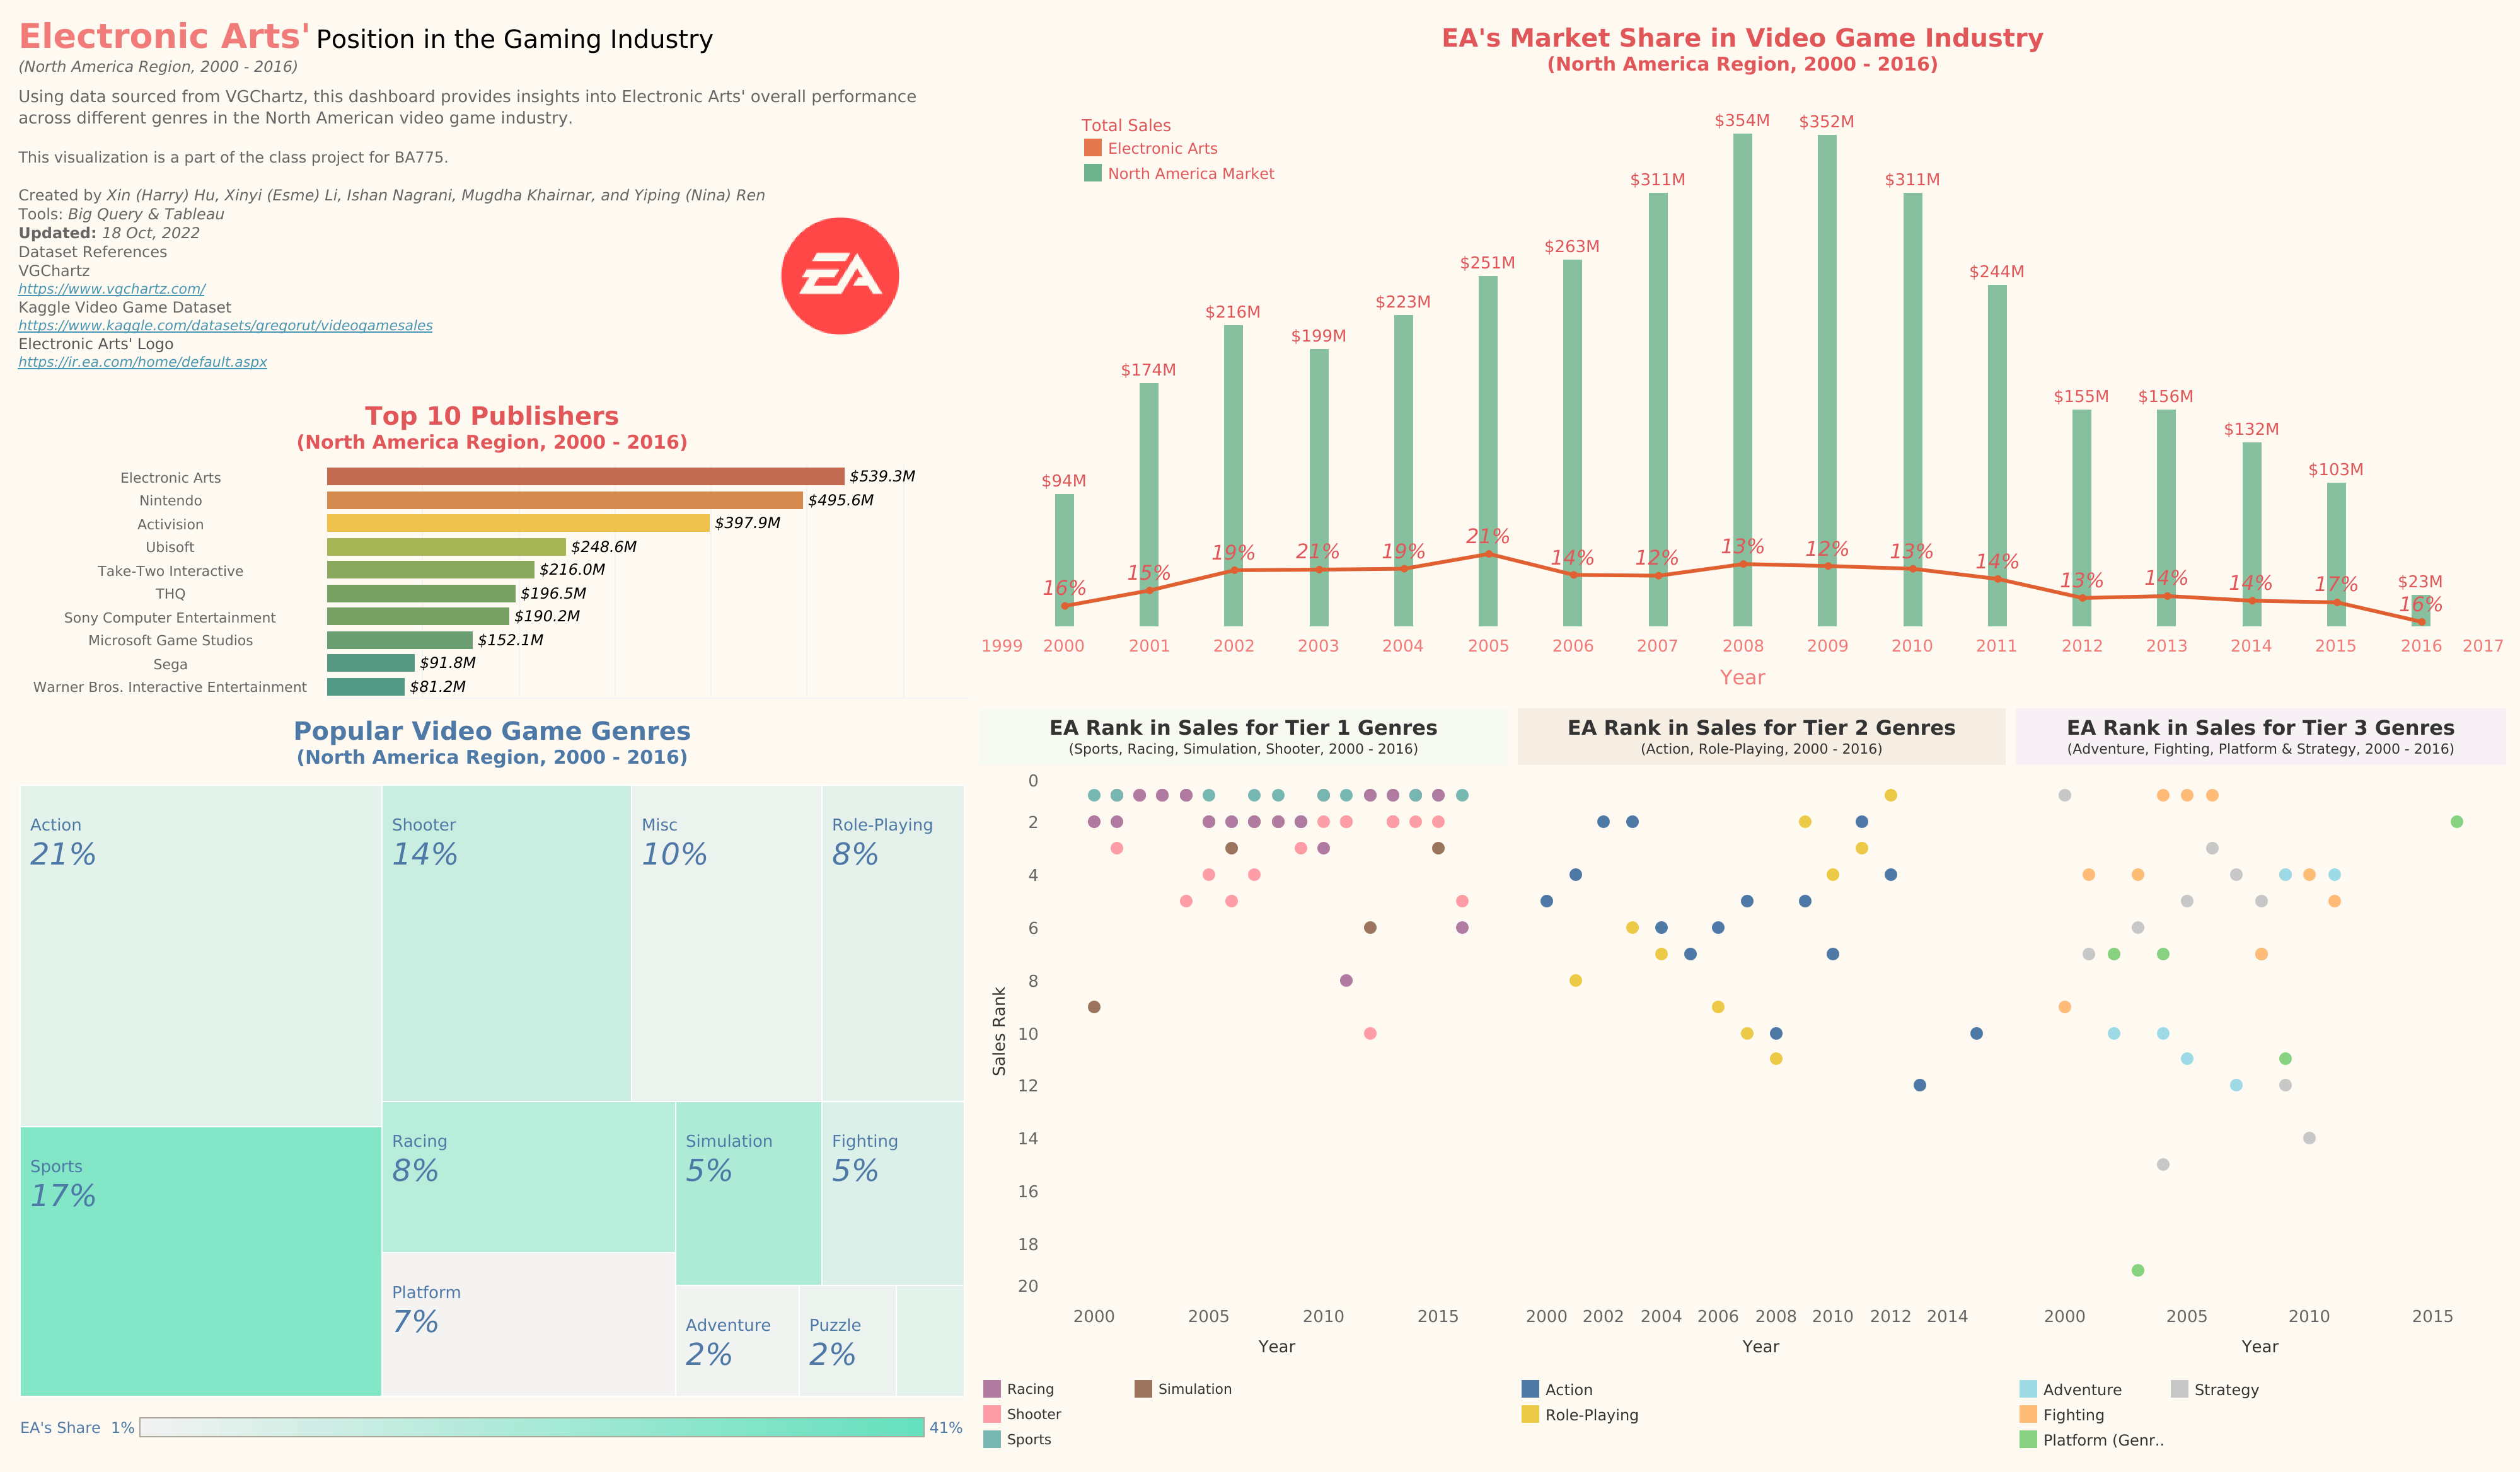

# 8. REFERENCES

* [VGChartz](www.vgchartz.com)
* [Dataset from Kaggle](https://www.kaggle.com/datasets/gregorut/videogamesales)
* [Electronic Arts’ Logo](https://ir.ea.com/home/default.aspx)
* [The 14 Best Selling EA](https://www.thegamer.com/best-selling-ea-franchises-ranked/)
* [EA - UFC](https://www.ea.com/games/ufc/ufc-4)
* [Gamer's demographics](https://dataprot.net/statistics/gamer-demographics/)
* [EA acquires bioware](https://www.ign.com/articles/2007/10/11/ea-buys-bioware-pandemic)